In [225]:
%matplotlib inline

In [226]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy
import sklearn.linear_model as linear
import random

sns.set(style="darkgrid")

#import matplotlib
#matplotlib.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)



## Directions

1. Show all work/steps/calculations. Generating Markdown cells for each answer or explanation as needed as well as Code cells for code. At minimum, you will be submitting 2 things:
    1. the .ipynb version of the notebook.
    2. the .html version of the notebook `$ jupyter nbconvert <name of notebook>.ipynb`. This is the copy that will be graded.
    
    You do not need to submit `heights.tsv` as long as you read/reference it from the same location as the notebook. Additionally, you must include any additional files or files in non-standard locations. For example, if you choose to move all the linear regression code to a library rather than include it in the notebook, you must include that library file.
    If we cannot run your code, the entire assignment is wrong, a "0". This is reproducible research.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results. Explain your decisions.** Why are you picking this procedure? Why are you defining the ROPE to be that size? What does a "90% Bayesian Confidence Interval" of (24.5, 27.8) *mean*?

This Problem Set involves EDA and linear regression. You should refer to the module notes for linear regression for function definitions and starter code (for example, plotting).

For this Problem Set, you will be using the `heights.tsv` file. This file contains the following columns (features):

* `earn` - During 1989, what was your personal income from your own wages, salary, or other sources, before taxes?
* `height1` - Height, feet.
* `height2` - Height, inches.
* `sex` - (Male, 1), (Female, 2)
* `race` - Are you (White, 1), (Black, 2), (Asian, 3), (Native American, 4), (Other, 5)
* `hispanic` - Are you hispanic? (Yes, 1), (No, 2)
* `ed` - What is the highest grade or year ln school that you have completed? (None, 0), (Elementary, 1-8), (High School 9-12), (College, 13-16), (Some Graduate School, 17), (Graduate School or Professional Degree, 18)
* `yearbn` - In what year were you born? 19\_\_
* `height` - Total height, in inches (computed from height1 and height2).

The data is from the *1990 Work, Family, and Well-Being Survey* (Ross, 1990), using only the columns `earn`, `height`, `sex`, `ed` and `yearbn`, we want to create a model that predicts `earn`.

For all questions that involve calculating a linear regression model, use `bootstrap_lm` and `describe_bootstrap_fit` from the Module notes. You will need to add Code and Markdown cells to this notebook in order to execute the code necessary to answer the questions as well as to provide all answers. **Clearly indicate what question you are answering**. **Please read all questions carefully before starting and make sure you understand what is being asked of you**.

1. Clean any unusually coded data (are binary and categorical variables coded usefully for linear regression?)
2. Perform EDA on the data set, note any patterns or problems you find.
3. Suppose you want to fit a model: `earn ~ height`. What sign do you expect $\beta_1$ (the coefficient on height) to have?
4. After fitting the model, what sign did $\beta_1$ have? Did the 95% credible interval for $\beta_1$ include 0? What is the interpretation of the $\beta_0$ (intercept) coefficient in this model? How can we improve the interpretability of the intercept term?
5. Suppose you want to fit the following model: `earn` explained by `height`, `sex`, `ed` and `yearbn`. What is your prior belief about the signs of the coefficients $\beta$s for your model? Fit the model.
6. Provide an interpretation of each coefficient from this model. Include a discussion of your "belief" in the value of the coefficient based on the 95% credible interval.
7. Plot the residuals against each of the numerical regressors. Is there a pattern that suggests a transformation would improve the regression?

The Problem Set will be graded based on the usual 3 point scale. Excellent will be based on the thoroughness and clarity of your answers for No. 1 - 7. There's a lot to do in Question 2, don't leave yourself short on time. Please remember, do not just execute the code. You must provide an interpretation of the results.

In [227]:
# Read TSV file

heights = pd.read_csv( "heights.tsv", sep="\t")
print heights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
earn       1379 non-null float64
height1    2021 non-null float64
height2    2023 non-null float64
sex        2029 non-null int64
race       2029 non-null int64
hisp       2029 non-null int64
ed         2029 non-null int64
yearbn     2029 non-null int64
height     2021 non-null float64
dtypes: float64(4), int64(5)
memory usage: 142.7 KB
None


In [228]:
# Testing the frequency of earns
heights.earn.value_counts()


0.0         187
15000.0      68
20000.0      66
25000.0      62
10000.0      62
30000.0      54
12000.0      52
35000.0      39
40000.0      35
5000.0       31
17000.0      30
8000.0       28
18000.0      28
6000.0       27
24000.0      25
16000.0      23
21000.0      23
4000.0       22
22000.0      22
28000.0      22
50000.0      21
27000.0      21
14000.0      21
26000.0      20
3000.0       19
60000.0      18
32000.0      17
7000.0       17
13000.0      16
2000.0       15
23000.0      15
11000.0      14
19000.0      13
45000.0      12
33000.0      12
9000.0       11
1000.0       11
36000.0      10
38000.0       8
70000.0       7
42000.0       6
43000.0       6
55000.0       5
29000.0       5
100000.0      5
31000.0       5
44000.0       5
1200.0        5
65000.0       4
3500.0        4
34000.0       4
1500.0        4
16500.0       4
80000.0       4
53000.0       3
600.0         3
12500.0       3
90000.0       3
41000.0       3
700.0         2
75000.0       2
6500.0        2
27500.0 

In [229]:
# Testing the frequency of height
heights.height.value_counts()

64.0    250
66.0    247
68.0    174
63.0    173
65.0    155
70.0    145
62.0    144
72.0    128
67.0    127
69.0    105
71.0     90
60.0     66
73.0     59
61.0     56
74.0     46
75.0     20
59.0     17
76.0      8
77.0      5
58.0      3
82.0      1
78.0      1
57.0      1
Name: height, dtype: int64

In [230]:
# Testing the frequency of sex
heights.sex.value_counts()

2    1281
1     748
Name: sex, dtype: int64

In [231]:
# Testing the frequeny of ed
heights.ed.value_counts()

# The values 98 and 99 are wrongly encoded in the dataset.
# These values can has to be 

12    762
16    269
14    254
13    154
18    133
15     94
17     92
11     72
8      64
10     54
9      41
6      13
7      11
5       8
4       4
3       1
99      1
98      1
2       1
Name: ed, dtype: int64

In [232]:
# Replace 98,99 by not a number as per discussions since the values are meaningless.
heights['ed'].replace(98, np.nan,inplace=True)
heights['ed'].replace(99, np.nan,inplace=True)

In [233]:
heights.ed.value_counts()

12.0    762
16.0    269
14.0    254
13.0    154
18.0    133
15.0     94
17.0     92
11.0     72
8.0      64
10.0     54
9.0      41
6.0      13
7.0      11
5.0       8
4.0       4
3.0       1
2.0       1
Name: ed, dtype: int64

In [234]:
# Testing the frequency of yearbn
heights.yearbn.value_counts()

60    59
57    56
61    54
58    54
49    52
64    51
54    50
52    49
53    48
59    48
51    48
62    47
56    47
67    45
68    45
47    45
50    44
55    43
69    39
63    39
48    39
65    37
39    36
66    35
44    34
72    34
42    31
70    31
31    30
27    30
46    30
45    30
71    29
28    27
21    27
25    26
29    26
34    26
32    25
43    24
41    23
33    23
30    23
35    22
99    20
38    20
40    20
23    20
36    19
37    19
12    18
15    18
17    18
18    17
26    17
24    17
19    17
22    16
16    16
14    16
13    16
8     14
20    11
9      7
11     6
10     5
7      5
6      3
2      3
0      3
5      2
4      2
1      2
3      1
Name: yearbn, dtype: int64

# Clean any unusually coded data (are binary and categorical variables coded usefully for linear regression?)

This relates to just our scope of the project:

From the discussion thread Null values? I will not be considering null values and will be dropping them when encountered.

Since, for this dataframe we are just considering

1) Earn: 0 are valid values while NaN will be dropped

2) Height: The height in inches all values seems valid 

3) Sex: From visulization module, 2 times female = male doesn't mean anything. Although if a variable is binary we don't see a good reason to build dummy variable. I shall use it because of ease in doing regression analysis where I dont have to write in a lot of code to check all the variable have equal number of observations.

4) yearbn: though year 0 doesn't have any meaning all the values in this dataset are from the year with initial 19-''. The data is from the year 1990 and thus data after this year has to be cleaned since it holds no relevance. 20 instances of year 1999.
5) ed: although number of years indicate the higher education this needs to be categorized and hence need for dummy _variable. ed_none for none, ed_ele for elementary, ed_high,ed_coll,ed_high,ed_prof.

In [235]:
# Replace 99 values from yearbn since the data is from 90.
heights['yearbn'].replace(99, np.nan,inplace=True)

In [236]:
# Testing the frequency of yearbn
# 99 is not included anymore
heights.yearbn.value_counts()

60.0    59
57.0    56
61.0    54
58.0    54
49.0    52
64.0    51
54.0    50
52.0    49
51.0    48
59.0    48
53.0    48
62.0    47
56.0    47
67.0    45
68.0    45
47.0    45
50.0    44
55.0    43
48.0    39
69.0    39
63.0    39
65.0    37
39.0    36
66.0    35
44.0    34
72.0    34
70.0    31
42.0    31
46.0    30
27.0    30
31.0    30
45.0    30
71.0    29
21.0    27
28.0    27
34.0    26
29.0    26
25.0    26
32.0    25
43.0    24
41.0    23
33.0    23
30.0    23
35.0    22
40.0    20
38.0    20
23.0    20
36.0    19
37.0    19
12.0    18
15.0    18
17.0    18
18.0    17
26.0    17
24.0    17
19.0    17
22.0    16
16.0    16
14.0    16
13.0    16
8.0     14
20.0    11
9.0      7
11.0     6
10.0     5
7.0      5
6.0      3
2.0      3
0.0      3
5.0      2
4.0      2
1.0      2
3.0      1
Name: yearbn, dtype: int64

In [237]:
# Replacing the numeric gender values with label

# Replace 
heights['sex'].replace(1, "male",inplace=True)
heights['sex'].replace(2,"female",inplace=True)

In [238]:
heights.sex.value_counts()

female    1281
male       748
Name: sex, dtype: int64

In [239]:
# From module 7
# Add male and female column
sex_dummies = pd.get_dummies( heights[ "sex"], prefix="sex")
sex_dummies.head()

,sex_female,sex_male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [240]:
# testing
sex_dummies.tail()

,sex_female,sex_male
2024,1.0,0.0
2025,1.0,0.0
2026,0.0,1.0
2027,1.0,0.0
2028,0.0,1.0


In [241]:
# Append dummy to the dataframe
heights = pd.concat( [heights, sex_dummies], axis=1)

In [242]:
# test to check append
heights.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,sex_female,sex_male
0,NaN,5.0,6.0,female,1,2,12.0,53.0,66.0,1.0,0.0
1,NaN,5.0,4.0,male,2,2,12.0,50.0,64.0,0.0,1.0
2,50000.0,6.0,2.0,male,1,2,16.0,45.0,74.0,0.0,1.0
3,60000.0,5.0,6.0,female,1,2,16.0,32.0,66.0,1.0,0.0
4,30000.0,5.0,4.0,female,1,2,16.0,61.0,64.0,1.0,0.0


In [243]:
# Replacing the numeric ed (education) values with relevant label

# Replace 
heights['ed'].replace(0, "none",inplace=True)
heights['ed'].replace((1,2,3,4,5,6,7,8), "ele",inplace=True)
heights['ed'].replace((9,10,11,12), "high",inplace=True)
heights['ed'].replace((13,14,15,16), "coll",inplace=True)
heights['ed'].replace(17, "grad",inplace=True)
heights['ed'].replace(18, "prof",inplace=True)

In [244]:
heights.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,sex_female,sex_male
0,NaN,5.0,6.0,female,1,2,high,53.0,66.0,1.0,0.0
1,NaN,5.0,4.0,male,2,2,high,50.0,64.0,0.0,1.0
2,50000.0,6.0,2.0,male,1,2,coll,45.0,74.0,0.0,1.0
3,60000.0,5.0,6.0,female,1,2,coll,32.0,66.0,1.0,0.0
4,30000.0,5.0,4.0,female,1,2,coll,61.0,64.0,1.0,0.0


In [245]:
heights.tail(3)

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,sex_female,sex_male
2026,60000.0,6.0,0.0,male,1,2,high,40.0,72.0,0.0,1.0
2027,NaN,5.0,3.0,female,3,2,coll,21.0,63.0,1.0,0.0
2028,6000.0,5.0,8.0,male,1,2,high,63.0,68.0,0.0,1.0


In [246]:
# Add ed dummies
ed_dummies = pd.get_dummies( heights[ "ed"], prefix="ed")
ed_dummies.head()

,ed_coll,ed_ele,ed_grad,ed_high,ed_prof
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [247]:
# Append dummy to the dataframe
heights = pd.concat( [heights, ed_dummies], axis=1)

In [248]:
# test to check append
heights.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,sex_female,sex_male,ed_coll,ed_ele,ed_grad,ed_high,ed_prof
0,NaN,5.0,6.0,female,1,2,high,53.0,66.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,NaN,5.0,4.0,male,2,2,high,50.0,64.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,50000.0,6.0,2.0,male,1,2,coll,45.0,74.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,60000.0,5.0,6.0,female,1,2,coll,32.0,66.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,30000.0,5.0,4.0,female,1,2,coll,61.0,64.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [249]:
# Drop NaN values:
updated_heights = heights.dropna()

In [250]:
# Test updated_height dataframe
updated_heights.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,sex_female,sex_male,ed_coll,ed_ele,ed_grad,ed_high,ed_prof
2,50000.0,6.0,2.0,male,1,2,coll,45.0,74.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,60000.0,5.0,6.0,female,1,2,coll,32.0,66.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,30000.0,5.0,4.0,female,1,2,coll,61.0,64.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,51000.0,5.0,3.0,female,1,2,grad,51.0,63.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,9000.0,5.0,4.0,female,1,2,coll,64.0,64.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Perform EDA on the data set, note any patterns or problems you find.

1) earn

2) height

3) sex

4) ed

5) yearbn


For earn
Use updated data frame

C:\Users\Shubhadeep\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


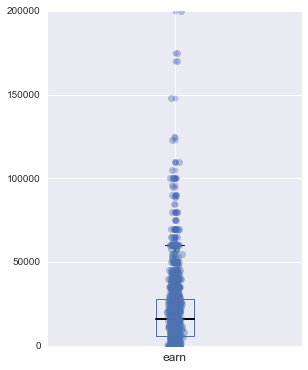

In [251]:
# Box plot for earn
def restyle_boxplot( patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 2, 2)
patch = updated_heights.boxplot(column="earn")
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(updated_heights["earn"]))
axes.plot(x, updated_heights[ "earn"], 'o', alpha=0.4)

plt.show()


The box plot for updated earn show that the range with highest value of 200k and lowest value of 0.

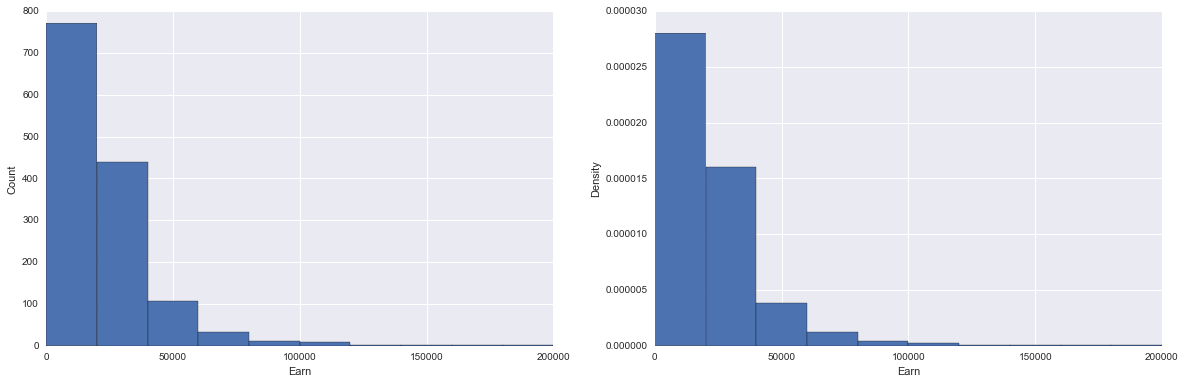

In [252]:
# Histogram of earn and counts

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( updated_heights[ "earn"])
axes.set_ylabel( "Count")
axes.set_xlabel( "Earn")

# Histogram of earn and desnity
axes = figure.add_subplot(1, 2, 2)
axes.hist( updated_heights[ "earn"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "Earn")

plt.show()

The earnings are not normally distributed as can be seen which is very true for a real world data. Rather exponentially distributed. 

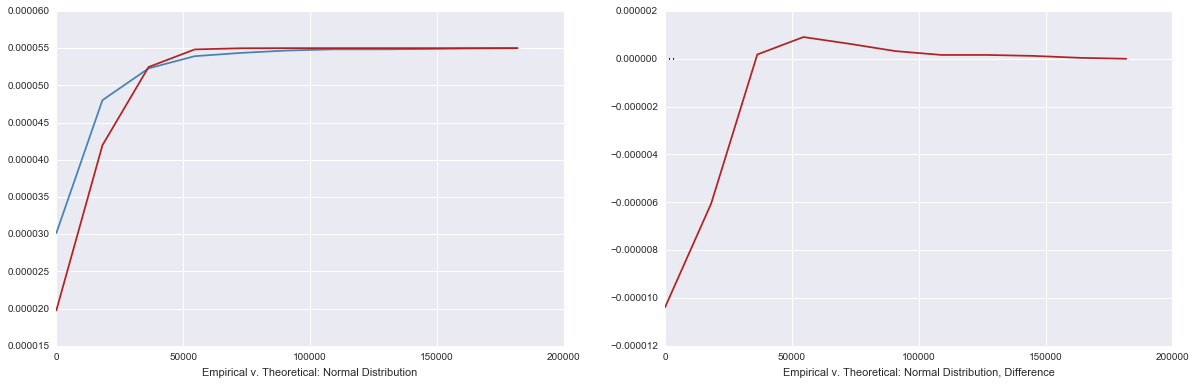

In [253]:
# normal reference distribution with the observed mean and standard deviation

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram( updated_heights.earn, bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot( base[:-1], cumulative, color="steelblue")
axes.set_xlim((np.min( updated_heights.earn), np.max( updated_heights.earn)))

weight_mean = np.mean( updated_heights.earn)
weight_std = np.std(updated_heights.earn)

sampled_data = [weight_mean + r * weight_std for r in np.random.standard_normal(10000)]
values2, base = np.histogram( sampled_data, bins=base, density=True)
cumulative2 = np.cumsum( values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((np.min( updated_heights.earn), np.max( updated_heights.earn)))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
axes = figure.add_subplot(1, 2, 2)

# Emperical vs normal distribution difference
differences = cumulative2 - cumulative
axes.plot( base[:-1], differences, color='firebrick')
axes.set_xlim((np.min( updated_heights.earn), np.max(updated_heights.earn)))
axes.hlines(0, 1500, 4000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
plt.show()

The difference between emperical vs theoretical indicates that the earnings (new_heights_earn.earn) is not normally distributed. This reinforces the notion that earnings are not normally distributed. 

# End of EDA of earning

Height is quantitative value
 Will drop the Nan value while plotting the boxplot all values are in inches.

C:\Users\Shubhadeep\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


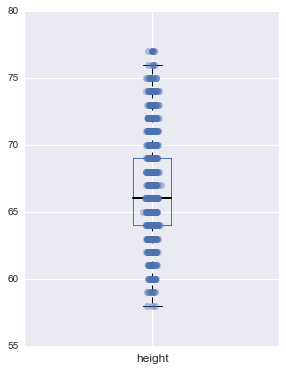

In [254]:
figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 2, 2)
patch = updated_heights.boxplot(column="height")
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(updated_heights["height"]))
axes.plot(x, updated_heights[ "height"], 'o', alpha=0.4)

plt.show()


The boxplot shows a range in inches from somewhat greater than 55 to less than 79. The median is around 66 inches.

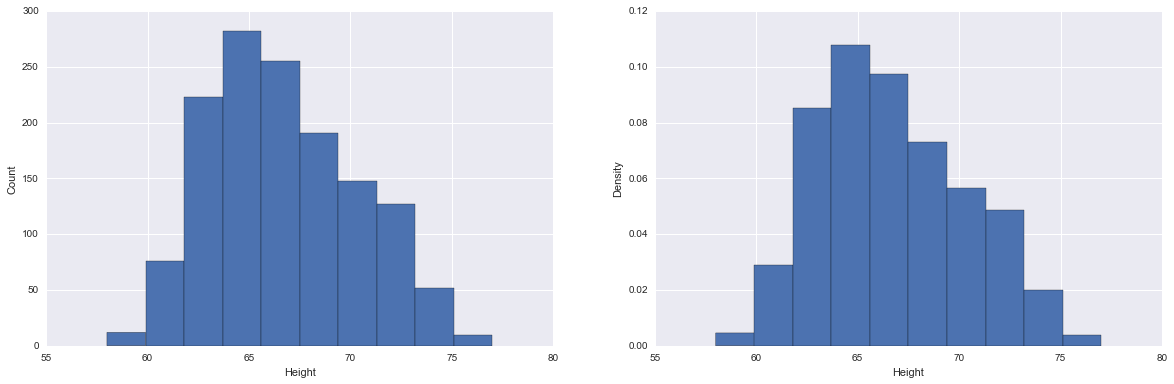

In [255]:
# Histogram of heights and counts

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( updated_heights[ "height"])
axes.set_ylabel( "Count")
axes.set_xlabel( "Height")

# Histogram of heights and desnity
axes = figure.add_subplot(1, 2, 2)
axes.hist( updated_heights[ "height"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "Height")

plt.show()

Plot showing the count of heights. From the plot of the histogram it appears that the log normal distribution seems to be a good distribution to model the height. The NaN values are dropped

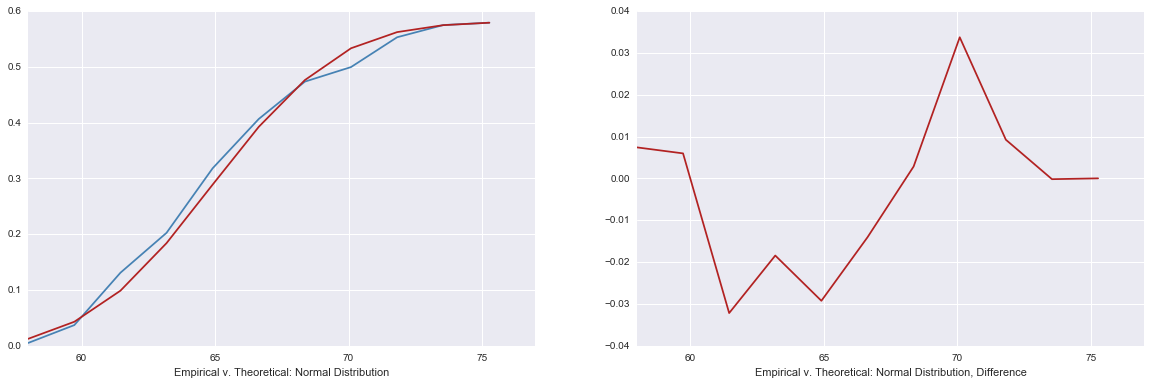

In [256]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram( updated_heights[ "height"], bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot( base[:-1], cumulative, color="steelblue")
axes.set_xlim((np.min( updated_heights[ "height"]), np.max( updated_heights[ "height"])))

weight_mean = np.mean( updated_heights[ "height"])
weight_std = np.std( updated_heights[ "height"])

sampled_data = [weight_mean + r * weight_std for r in np.random.standard_normal(10000)]
values2, base = np.histogram( sampled_data, bins=base, density=True)
cumulative2 = np.cumsum( values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((np.min( updated_heights[ "height"]), np.max( updated_heights[ "height"])))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot( base[:-1], differences, color='firebrick')
axes.set_xlim((np.min( updated_heights[ "height"]), np.max( updated_heights[ "height"])))
axes.hlines(0, 1500, 4000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
plt.show()

The difference in emperical and theoretical normal distribution showing where normal distribution will over estimate and on what range it will underestimate. Overall it appears log normal distribution is a good model for height.

# Sex: Qualitative value.

The variable sex can take two value male female. Though, its been apended in the data frame by using two dummy variable. This is for ease in doing regression analysis.


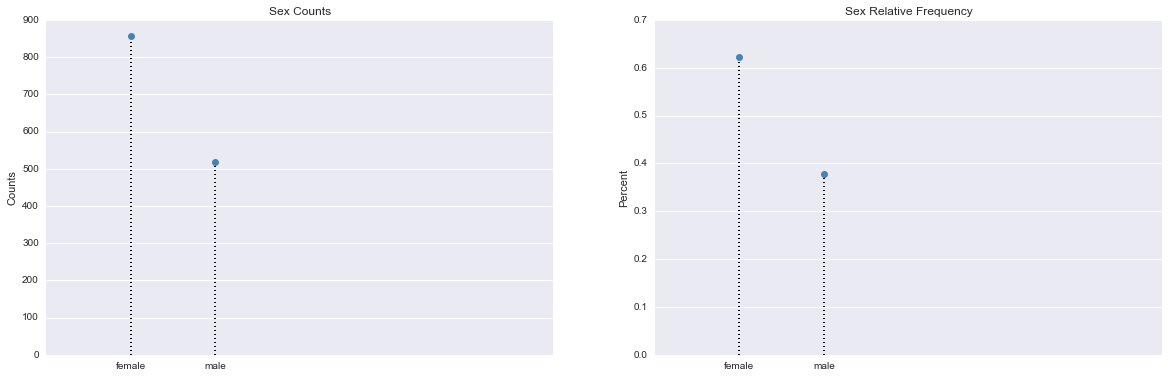

In [257]:
data1 = updated_heights[ "sex"].value_counts()
data2 = updated_heights[ "sex"].value_counts( normalize=True)
x = range( len( data1))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

xs = [1, 2]
axes = figure.add_subplot(1, 2, 1)
axes.plot(xs, data1, "o", color="steelblue")
axes.vlines(xs, [0], data1, linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_xticklabels(data1.axes[0])
axes.set_title( "Sex Counts")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.plot(xs, data2, "o", color="steelblue")
axes.vlines(xs, [0], data2, linestyles='dotted', lw=2)
axes.set_xlim((0, 6))
axes.set_xticks(xs)
axes.set_xticklabels(data2.axes[0])
axes.set_title( "Sex Relative Frequency")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()

Dot charts of sex counts showing number of females and males and relative frequency chart showing upto 63% female 37% males.

# Education: Qualitative value.

The variable ed can take six value ed_none, ed_coll, ed_ele,ed_grad, ed_high, ed_prof . 



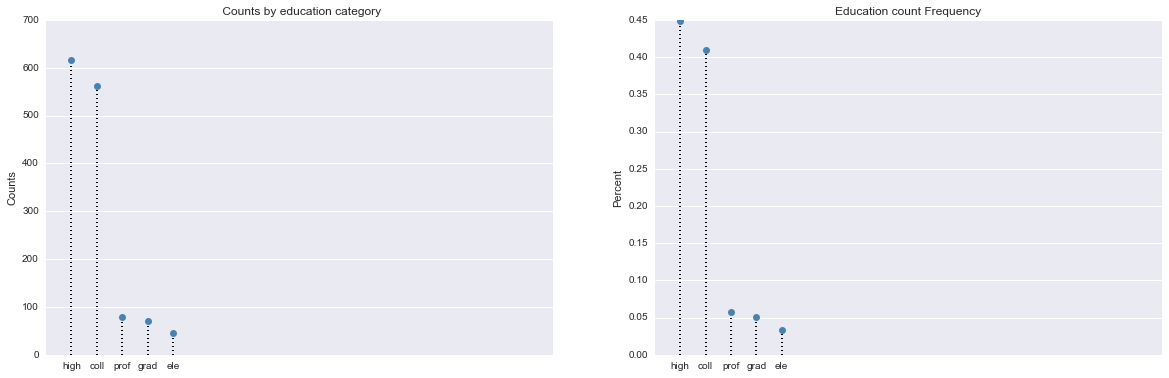

In [258]:
data1 = updated_heights[ "ed"].value_counts()
data2 = updated_heights[ "ed"].value_counts( normalize=True)
x = range( len( data1))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

xs = [1,2,3,4,5]
axes = figure.add_subplot(1, 2, 1)
axes.plot(xs, data1, "o", color="steelblue")
axes.vlines(xs, [0], data1, linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((0, 20))
axes.set_xticklabels(data1.axes[0])
axes.set_title( " Counts by education category")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.plot(xs, data2, "o", color="steelblue")
axes.vlines(xs, [0], data2, linestyles='dotted', lw=2)
axes.set_xlim((0, 20))
axes.set_xticks(xs)
axes.set_xticklabels(data2.axes[0])
axes.set_title( "Education count Frequency")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()

By analysis we see that data is exponentialialy distributed with most people having just a high school diploma around more than  600. As a relative frequency we can see that aroun 45% people have just high school diploma.

# yearborn: Quantitative value.

The values NaN are dropped from all yearbn this includes the ones born after 1990.

C:\Users\Shubhadeep\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


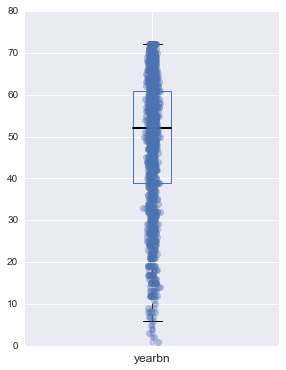

In [259]:

# Box plot for yearbn
def restyle_boxplot( patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 2, 2)
patch = updated_heights.boxplot(column="yearbn")
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(updated_heights["yearbn"]))
axes.plot(x, updated_heights[ "yearbn"], 'o', alpha=0.4)

plt.show()

The range cover entire year from 1900 - to mid 70's. Box plot showing the data points

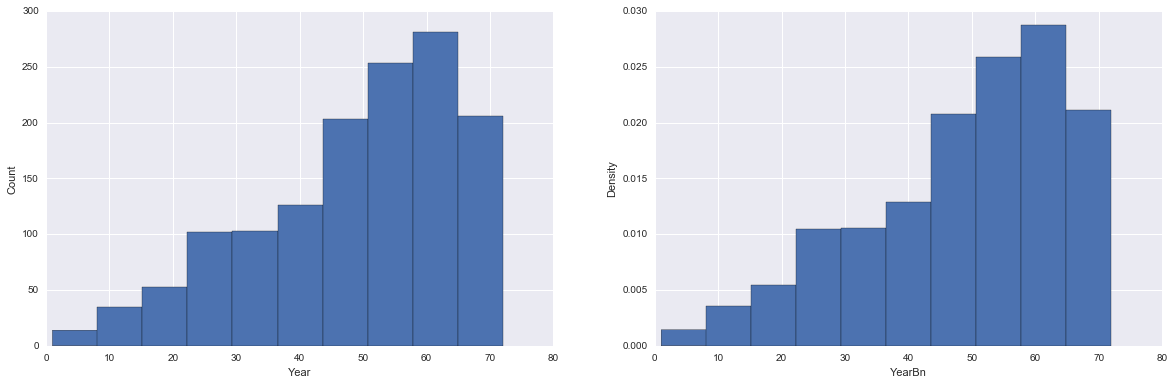

In [260]:
# Histogram of 
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( updated_heights[ "yearbn"])
axes.set_ylabel( "Count")
axes.set_xlabel( "Year")

axes = figure.add_subplot(1, 2, 2)
axes.hist( updated_heights[ "yearbn"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "YearBn")

plt.show()

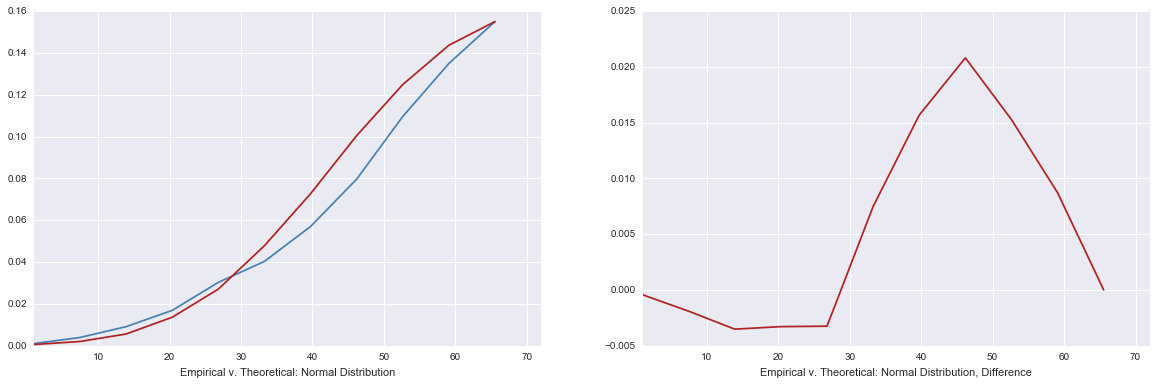

In [261]:
# Plot difference of Emplerical and theoretical normal distribution for year born
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram( updated_heights[ "yearbn"], bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot( base[:-1], cumulative, color="steelblue")
axes.set_xlim((np.min( updated_heights[ "yearbn"]), np.max( updated_heights[ "yearbn"])))

weight_mean = np.mean( updated_heights[ "yearbn"])
weight_std = np.std( updated_heights[ "yearbn"])

sampled_data = [weight_mean + r * weight_std for r in np.random.standard_normal(10000)]
values2, base = np.histogram( sampled_data, bins=base, density=True)
cumulative2 = np.cumsum( values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((np.min( updated_heights[ "yearbn"]), np.max( updated_heights[ "yearbn"])))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot( base[:-1], differences, color='firebrick')
axes.set_xlim((np.min( updated_heights[ "yearbn"]), np.max( updated_heights[ "yearbn"])))
axes.hlines(0, 1500, 4000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
plt.show()

By looking at this plot of difference it can be seen normal distribution is a satisfactory model for year born. The yearbn are not truly  normally distributed it can be said, since many data points from positive two standard deviations of the mean are missing. The values of people born in 1970 - 1990.

Since height and yearbn appears to be  normally distributed and both are quantitative variable lets plot a scatterplot to see if there is any relation.

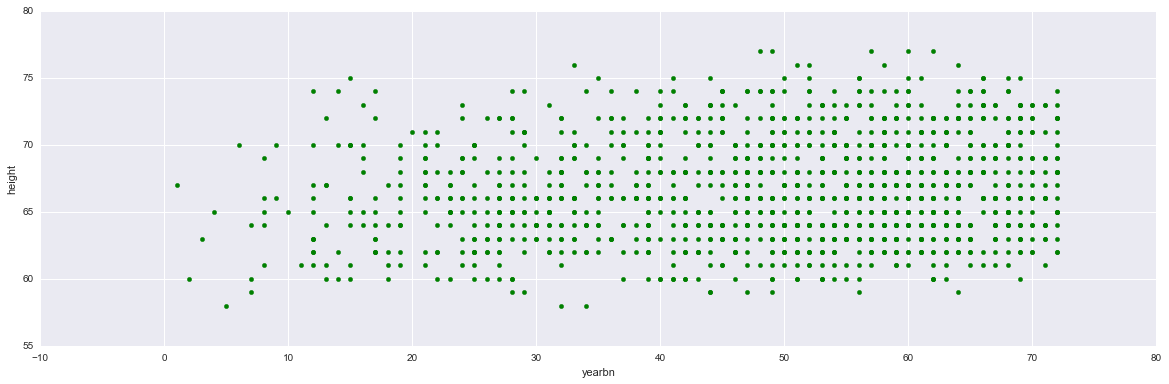

In [262]:
#Plot Scatterplot
figure2 = plt.figure(figsize=(20,6))
axes = figure2.add_subplot(1, 1, 1)
axes.scatter(updated_heights["yearbn"], updated_heights["height"], marker="o", color="green")
axes.set_xlabel( "yearbn")
axes.set_ylabel( "height")
plt.show()

By looking at the chart it appears that data for people born in the late 70's till late 80's are missing. Also can be noticed that the data has very few people from the decade 1910-1920 while majority of the people who took the survey where born from 1940 to 1970's.

In [263]:
# Correlation using Spearman 
print "Spearman Correlation Coefficient: "
updated_heights.corr(method="spearman")

Spearman Correlation Coefficient: 


,earn,height1,height2,race,hisp,yearbn,height,sex_female,sex_male,ed_coll,ed_ele,ed_grad,ed_high,ed_prof
earn,1.000000,0.198628,0.125939,-0.013411,0.048302,-0.105891,0.337379,-0.390152,0.390152,0.128270,-0.144622,0.126524,-0.235236,0.222717
height1,0.198628,1.000000,-0.526280,-0.016303,0.002190,0.112424,0.614290,-0.490580,0.490580,0.026786,-0.030726,0.027053,-0.033963,0.014100
height2,0.125939,-0.526280,1.000000,-0.021164,0.076459,-0.003229,0.341750,-0.161693,0.161693,0.006980,-0.007483,0.035316,-0.038803,0.040387
race,-0.013411,-0.016303,-0.021164,1.000000,0.007961,0.036379,-0.039553,-0.000643,0.000643,0.026827,0.059573,0.002268,-0.048947,-0.000233
hisp,0.048302,0.002190,0.076459,0.007961,1.000000,-0.070759,0.066532,0.011698,-0.011698,-0.020639,-0.040179,-0.013147,0.024180,0.035185
yearbn,-0.105891,0.112424,-0.003229,0.036379,-0.070759,1.000000,0.119157,-0.080514,0.080514,0.097617,-0.164951,0.006504,0.002780,-0.090412
height,0.337379,0.614290,0.341750,-0.039553,0.066532,0.119157,1.000000,-0.703214,0.703214,0.031727,-0.036626,0.060664,-0.070949,0.055297
sex_female,-0.390152,-0.490580,-0.161693,-0.000643,0.011698,-0.080514,-0.703214,1.000000,-1.000000,-0.001975,0.002922,-0.024548,0.035336,-0.050143
sex_male,0.390152,0.490580,0.161693,0.000643,-0.011698,0.080514,0.703214,-1.000000,1.000000,0.001975,-0.002922,0.024548,-0.035336,0.050143
ed_coll,0.128270,0.026786,0.006980,0.026827,-0.020639,0.097617,0.031727,-0.001975,0.001975,1.000000,-0.154761,-0.192658,-0.750293,-0.206753


# Summary of Corellation - 
The corellation coefficient using Spearman summary:
 corelation coefficion is not so strong between earn and height. 
 corelation coefficient for sex and height is strong.
 out of all education's corelation coefficient is strongest between earn and ed_prof
 

Heat map for qualitative data for education and sex to see if there is any corelation among the data.

sex     female      male
ed                      
coll  0.254360  0.154797
ele   0.021076  0.012355
grad  0.029070  0.021802
high  0.287791  0.160610
prof  0.030523  0.027616


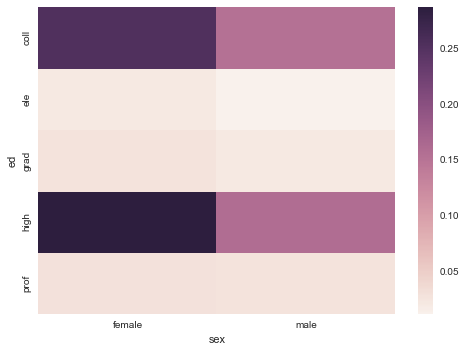

In [264]:
frequencies = pd.crosstab( updated_heights[ "ed"], updated_heights[ "sex"]).apply(lambda r: r/len(updated_heights))
print frequencies

sns.heatmap( frequencies)

From this heat map we can interpret that:

Females:
Females in the data set who are (the majority gender) in the study 28(females)/100(people) approx have high school diploma
This is followed by college where 25 females of 100 people have completed college.

Males:
Males propotion 16/100(people) have attended high school followed by college 15/100

In [265]:
#Analyze a quantitative vs qualitative variable
# sex and earn

grouped = updated_heights.groupby( "sex")
earn_sex = grouped[ "earn"].describe()
earn_sex = earn_sex.unstack( level=-1)
print earn_sex

        count          mean           std  min      25%      50%      75%       max
sex                                                                                
female  857.0  14567.670945  14666.098693  0.0   3000.0  12000.0  22000.0  123000.0
male    519.0  28930.628131  23517.259823  0.0  15000.0  25000.0  36000.0  200000.0


Males have a high mean salary which is approximately twice that of female. Shocking! 
The Maximum salary earned by female is just 60% to that of male.
The 3rd quartile earning difference between men and women is also at 14k dollars.

In [266]:
#Analyze a quantitative vs qualitative variable
# ed and earn

grouped = updated_heights.groupby( "ed")
earn_ed = grouped[ "earn"].describe()
earn_ed = earn_ed.unstack( level=-1)
print earn_ed

      count          mean           std  min      25%      50%      75%       max
ed                                                                               
coll  563.0  22024.689165  19020.687743  0.0   9000.0  19000.0  30000.0  175000.0
ele    46.0   7848.434783   9151.156652  0.0   1200.0   5406.0  12750.0   50000.0
grad   70.0  28107.142857  18710.396408  0.0  20000.0  25000.0  34750.0  100000.0
high  617.0  14983.893031  14061.249777  0.0   3500.0  12000.0  22000.0  105000.0
prof   80.0  44075.000000  37085.865130  0.0  24000.0  30000.0  55000.0  200000.0


Mean earnings of people with a professional degree is highest at 44k this is followed by gradschool at 28k and college 22k.(roughly)

High school where maximum proportion of people graduate from has a mean earning of 14983. 

All figures are in Dollars.

# Multiple Boxplots

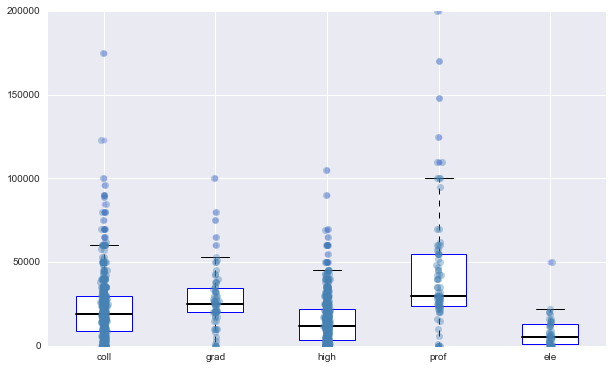

In [267]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

body_styles = pd.unique( updated_heights[ "ed"].values)
data = [grouped[ "earn"].get_group( k) for k in body_styles]
patch = axes.boxplot( data, labels=body_styles, patch_artist=True)
restyle_boxplot( patch)

for i, k in enumerate( body_styles):
    data = grouped[ "earn"].get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(data))
    axes.plot(x, data, 'o', alpha=0.4, color="steelblue")

plt.show()

The professional degree has the highest earning range. The median is higest for this group as well.

# 3) Suppose you want to fit a model: earn ~ height. What sign do you expect β1  (the coefficient on height) to have?


By analyzing the spearment  corelation coefficent it appears that earn and height have a postive linear corelation. So my expecation would be the coefficient of the predictor (regressor, height) will be a postive value.  

4) After fitting the model, what sign did  β1  have? Did the 95% credible interval for  β1  include 0? What is the interpretation of the  β0  (intercept) coefficient in this model? How can we improve the interpretability of the intercept term?
 The regression analysis

In [268]:
# Helper functions
def lm( formula, data=None):
    if data is None:
        raise ValueError( "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")

    result = {}
    result[ "formula"] = formula
    result[ "n"] = data.shape[ 0]

    y, X = patsy.dmatrices( formula, data, return_type="matrix")
    model = linear.LinearRegression( fit_intercept=False).fit( X, y)

    result[ "coefficients"] = model.coef_[ 0]

    result[ "r^2"] = model.score( X, y)
    
    y_hat = model.predict( X)
    result[ "residuals"] = y - y_hat
    
    sum_squared_error = sum([ e**2 for e in result[ "residuals"]])[ 0]

    n = len( result[ "residuals"])
    k = len( result[ "coefficients"])
    
    result[ "sigma"] = np.sqrt( sum_squared_error / (n - k))
    
    return result

def bootstrap_lm( formula, data=None, samples=100):
    if data is None:
        raise ValueError( "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    
    bootstrap_results = {}
    bootstrap_results[ "formula"] = formula

    variables = map( lambda x: x.strip(), formula.split("~")[1].split( "+"))
    variables = ["intercept"] + variables
    bootstrap_results[ "variables"] = variables
    
    coeffs = []
    sigmas = []
    rs = []

    n = data.shape[ 0]
    bootstrap_results[ "n"] = n
    
    for i in xrange( samples):
        sampling_indices = [ i for i in [random.randint(0, n - 1) for _ in xrange( 0, n)]]
        sampling = data.loc[ sampling_indices]
        
        results = lm( formula, data=sampling)
        coeffs.append( results[ "coefficients"])
        sigmas.append( results[ "sigma"])
        rs.append( results[ "r^2"])
    
    coeffs = pd.DataFrame( coeffs, columns=variables)
    sigmas = pd.Series( sigmas, name="sigma")
    rs = pd.Series( rs, name="r^2")

    bootstrap_results[ "resampled_coefficients"] = coeffs
    bootstrap_results[ "resampled_sigma"] = sigmas
    bootstrap_results[ "resampled_r^2"] = rs
    
    result = lm( formula, data=data)
    
    bootstrap_results[ "residuals"] = result[ "residuals"]
    bootstrap_results[ "coefficients"] = result[ "coefficients"]
    bootstrap_results[ "sigma"] = result[ "sigma"]
    bootstrap_results[ "r^2"] = result[ "r^2"]
    return bootstrap_results

def describe_bootstrap_fit( result):
    print "regression: ", result[ "formula"]
    print "n: ", result[ "n"]
    print "----------"
    
    
    bounds = result[ "resampled_coefficients"].quantile([0.025, 0.975])
    bounds = bounds.transpose()
    bounds = bounds.values.tolist()

    for variable, coefficient, bound in zip( result[ "variables"], result["coefficients"], bounds):
        print variable + ": ", coefficient, bound
    print "----------"
    
    sigma_bounds = stats.mstats.mquantiles( result[ "resampled_sigma"], [0.025, 0.975])
    print "sigma", result[ "sigma"], sigma_bounds

    r_bounds = stats.mstats.mquantiles( result[ "resampled_r^2"], [0.025, 0.975])
    print "R^2", result[ "r^2"], r_bounds


In [269]:
result = bootstrap_lm( "earn ~ height", data = updated_heights)
describe_bootstrap_fit( result)

regression:  earn ~ height
n:  1376
----------
intercept:  -84633.9215537 [-108556.48322404757, -66113.60726611447]
height:  1571.0549608 [1295.535652982146, 1939.3987907596563]
----------
sigma 18849.0055929 [ 16209.32271669  20846.93763693]
R^2 0.0914375095298 [ 0.06155903  0.13968775]


# what sign did β1 have
Positive as expected

# Did the 95% credible interval for β1 include 0
No, it doesn't include the value 0. So according to the rule book we should keep this value as we expect a positive coefficient and we get one.

# What is the interpretation of the β0 (intercept) coefficient in this model
Intercept beta0 is negative, since height cannot be a zero value the current model would give us a negative value of earnings if height is less. 

>>earn = -84633.921 +1571.05*(height)

# How can we improve the interpretability of the intercept term?
earnings are exponentially distributed if we take log of the earnings, I belive we can see an improvement in the interpretability of the intercept. Since earn is a response variable and has many data points which are zero I wont be doing it. Instead I will be scaling the height to improve upon the coeffcient. I will be using mean centric scaling and divide by 2 std deviation Gelman.

In [271]:
def scale( df, variable):
    x_bar = df[ variable].mean()
    std = df[ variable].std()
    scaled_variable = (df[ variable] - x_bar) / (2.0 * std)
    df[ variable + "_scaled"] = scaled_variable

In [274]:
scale(updated_heights, "height")

C:\Users\Shubhadeep\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [278]:
updated_heights.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,sex_female,sex_male,ed_coll,ed_ele,ed_grad,ed_high,ed_prof,height_scaled
2,50000.0,6.0,2.0,male,1,2,coll,45.0,74.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.973582
3,60000.0,5.0,6.0,female,1,2,coll,32.0,66.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.077741
4,30000.0,5.0,4.0,female,1,2,coll,61.0,64.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.340572
8,51000.0,5.0,3.0,female,1,2,grad,51.0,63.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.471987
9,9000.0,5.0,4.0,female,1,2,coll,64.0,64.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.340572


In [279]:
# improve the interpretability by scaling

result = bootstrap_lm( "earn ~ height_scaled", data = updated_heights)
describe_bootstrap_fit( result)

regression:  earn ~ height_scaled
n:  1376
----------
intercept:  19985.0944767 [18985.16331934076, 21127.589754056735]
height_scaled:  11954.8807669 [9904.330120220699, 14991.538756723046]
----------
sigma 18849.0055929 [ 16267.61178293  20252.02611822]
R^2 0.0914375095298 [ 0.06673078  0.13745145]


The intercept is a positive value 19,985.
The model can be interpreted as
earn = 19985.0944767 + 11954.8807669 * height

Since 95% CI of the intercept is positive and doesn't contain the value 0. We will keep it.

# Suppose you want to fit the following model: earn explained by height, sex, ed and yearbn. What is your prior belief about the signs of the coefficients  βs for your model? Fit the model.




By ETA which we have done above we can say that:
Corelation Coefficient
    
1) Height: By Spearmen coefficient the beta of height is positive and will result in increase of the earnings

2) Sex: Mean earnings of Male are higher than female but at looking at the Spearmen corelation coefficient we see male earnings will have a positive sign for beta while female a negative

3) ed: sorted order decreasing : positives : ed_prof 0.222717, ed_coll0.128270 , ed_grad 0.126524, negatives :ed_ele -0.144622, ed_high -0.235236

4) yearbn: negative coefficient corelation negative -0.105891

In [280]:
result = bootstrap_lm( "earn ~ height_scaled + ed_coll + ed_ele + ed_grad + ed_high+ed_prof+ sex_female +sex_male + yearbn", data = updated_heights)
describe_bootstrap_fit( result)

regression:  earn ~ height_scaled + ed_coll + ed_ele + ed_grad + ed_high+ed_prof+ sex_female +sex_male + yearbn
n:  1376
----------
intercept:  18266.0181871 [15582.931772241056, 20412.244400456926]
height_scaled:  3437.06808512 [34.52726922363949, 5501.184228579042]
ed_coll:  3265.89666833 [1560.9841382490813, 6154.86059643718]
ed_ele:  -12832.4379204 [-15488.108595799447, -8898.612807193585]
ed_grad:  8369.08232222 [2306.2828878340297, 10850.242296165745]
ed_high:  -3627.70573651 [-4576.358005021895, -716.745247991269]
ed_prof:  23091.1828535 [14277.099642147807, 30142.528678976607]
sex_female:  3440.17147393 [982.5989988237187, 4174.201450315222]
sex_male:  14825.8467132 [13288.94558689846, 17870.967622027314]
yearbn:  -144.822574964 [-202.6779388286671, -69.20392149599795]
----------
sigma 16998.7516102 [ 14324.56308492  18863.52138488]
R^2 0.26535768629 [ 0.22916379  0.34797811]


# Provide an interpretation of each coefficient from this model. Include a discussion of your "belief" in the value of the coefficient based on the 95% credible interval.

Discussions on coefficients from the regression model.

The intercept is positive 95%CI doesn't have a zero value we were expecting a positive value so this seems true believebale.

height_scaled:coefficient is positive 95%CI doesn't have a zero value and is positive so we will keep this in model believable

ed_coll: coefficient is positive 95%CI doesn't have a zero value and is positive so we will keep this in model believable

ed_ele:  coefficient is negative 95%CI doesn't have a zero value and is negative  so we will keep this in model believable

ed_grad: coefficient is positive 95%CI doesn't have a zero value and is positive so we will keep this in model believable

ed_high: coefficient is negative 95%CI doesn't have a zero value and is negative  so we will keep this in model believable

ed_prof: coefficient is positive 95%CI doesn't have a zero value and is positive so we will keep this in model believable

sex_female: we were expecting negative values 95% CI is positive. Thus our prior belief was wrong. This is believable

yearbn: or current age at 1990 : expected coefficient negative 95% CI negative believable.


Interpretations:

If you  have college degree earnings would increase, so would having a grad deegree and proffesional school degree.

If you just have elementary and high school degree earning would reduce.

Male earnings are higher than female

If your height is close to the avg height the earning would increase



# Plot the residuals against each of the numerical regressors. Is there a pattern that suggests a transformation would improve the regression?

[(1.0, array([-4503.81780217])), (2.0, array([-1705.13761237])), (3.0, array([-11021.76325274])), (4.0, array([-10059.58540201])), (5.0, array([ 231.03178132])), (6.0, array([ 4865.24445247])), (7.0, array([ 4470.6588025])), (7.0, array([ 1617.30985113])), (7.0, array([-16587.75889778])), (8.0, array([-7749.33391797]))]


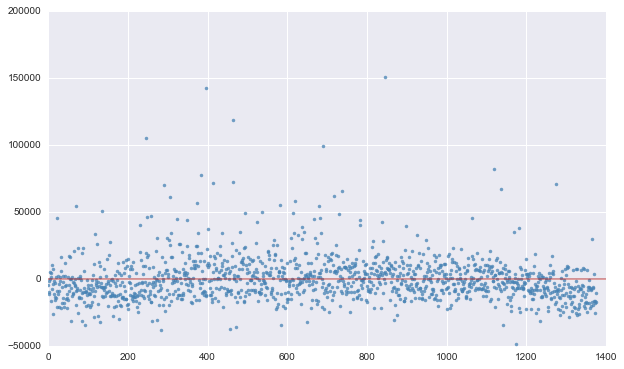

In [281]:
# Residual Plot of yearbn
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

# order the residuals by yearbn

keyed_values = sorted( zip( updated_heights[ "yearbn"].values, result[ "residuals"]), key=lambda x: x[ 0])
print keyed_values[ 0:10]
residuals = map( lambda x: x[ 1][ 0], keyed_values)

axes.plot(range(0, result[ "n"]), residuals, '.', color="steelblue", alpha=0.75)
axes.axhline(y=0.0, xmin=0, xmax=result[ "n"], c="firebrick", alpha=0.5)

[(-1.1290642347175264, array([ 30726.15427142])), (-1.1290642347175264, array([-8563.4908785])), (-1.1290642347175264, array([ 231.03178132])), (-0.99764887462859742, array([ 4725.54557544])), (-0.99764887462859742, array([ 5553.20695098])), (-0.99764887462859742, array([ 13755.09004039])), (-0.99764887462859742, array([-7677.303519])), (-0.99764887462859742, array([ 4470.6588025])), (-0.99764887462859742, array([-2488.06712326])), (-0.99764887462859742, array([ 28460.56738057]))]


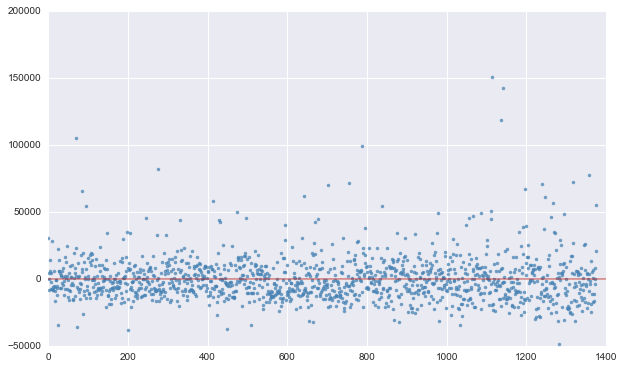

In [282]:
# Residual Plot of height_scaled
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

# order the residuals by height_scaled

keyed_values = sorted( zip( updated_heights[ "height_scaled"].values, result[ "residuals"]), key=lambda x: x[ 0])
print keyed_values[ 0:10]
residuals = map( lambda x: x[ 1][ 0], keyed_values)

axes.plot(range(0, result[ "n"]), residuals, '.', color="steelblue", alpha=0.75)
axes.axhline(y=0.0, xmin=0, xmax=result[ "n"], c="firebrick", alpha=0.5)

The residuals for both height scaled and yearbn doesnt have any pattern and are evenly spread out around baseline the differene in earning between the predicted and the actual value for most data point is within the +/- 50 K range. The model can be improved by making it a linear log model by taking the log of earnings. Since earnings are exponentially distributed sigma value of the model will be low. Though a decision needs to be made on how to go about updating the 0 values in earn. Getting rid of 0 values will mean loss of large chunk of data whereas making it close to mean will let a standardized response. 